Importing required Libraries

In [2]:
import tensorflow as tf
import os
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
import streamlit as st

# Currency Prediction

- Download the exchange rates for some currencies, 10 years back.
- Loading the downloaded dataset as pandas dataframe
- These currencies [HKD	EUR	CAD	USD	AUD	SGD	JPY	PKR	SEK	NZD	TRY	BRL] are considered vs 100 NOK
- The follwoing exchange are reported by NorgesBank on 13.10.2023
1. USD = 10.94 NOK, 1 AUD = 6.91 NOK, 1 BRL = 2.16 NOK, 1 EUR = 11.52 NOK, 1 HKD = 1.40 NOK ...
2. 100 JPY = 7.31 NOK, 1 CAD = 8.00 NOK, 1 NZD = 6.46 NOK, 100 PKR = 3.94 NOK, 1 SGD = 8.14 NOK ...
3. 100 SEK = 99.71 NOK, 100 TRY = 39.36 NOK
- The dataset is in the range from  [2013-10-14]  til [2023-10-13]

In [3]:
# adding the path to the dataset
filepath = r"C:/Users/baqer/OneDrive - OsloMet/Oslomet ACIT/Høst2023/ACIT4420 Problem Solvign with scripting/Final_project/02.Data/DataNorgesBank.xlsx"
# Loading the dataset as pandas DataFrame
raw_data = pd.read_excel(filepath)
# Compying the dataset for data preprocessing 
df = raw_data.copy()
# Setting the Time as datetime format
df['Time'] = pd.to_datetime(df['Time'], dayfirst=False)
# Set the 'Time' column as the index
df.set_index('Time', inplace=True)
# Displaying few samples of the dataset
df.head(4) # Two samples from first two rows
df.tail(4) # Two samples from last two rows
# Concat both as one single dataframe 
Sample = pd.concat([df.head(4), df.tail(4)])
# Displaying Sample as pandas DataFrame 
Sample.head(12)

,HKD,EUR,CAD,USD,AUD,SGD,JPY,PKR,SEK,NZD,TRY,BRL
Time,,,,,,,,,,,,
2013-10-14,0.7732,8.1325,5.7920,5.9957,5.6819,4.8161,6.1059,5.645,92.43,5.0114,302.00,2.7561
2013-10-15,0.7759,8.1180,5.8089,6.0165,5.7302,4.8408,6.1088,5.663,92.65,5.0360,302.59,2.7537
2013-10-16,0.7737,8.1365,5.7841,5.9999,5.7191,4.8233,6.1002,5.652,92.34,5.0468,302.15,2.7614
2013-10-17,0.7660,8.1150,5.7680,5.9398,5.7160,4.7882,6.0723,5.596,92.45,5.0466,301.79,2.7416
2023-10-10,1.3894,11.4965,7.9909,10.8642,6.9516,7.9506,7.2896,3.876,99.10,6.5277,39.18,2.1207
2023-10-11,1.3864,11.4953,7.9668,10.8405,6.9546,7.9547,7.2815,3.867,99.39,6.5262,39.09,2.1502
2023-10-12,1.3866,11.5165,7.9782,10.8452,6.9443,7.9589,7.2728,3.894,99.77,6.5050,39.08,2.1484
2023-10-13,1.3984,11.5160,7.9989,10.9426,6.9115,7.9944,7.3145,3.944,99.71,6.4620,39.36,2.1585


In [4]:
# Checking for the missing values
print(pd.DataFrame(df.isnull().sum()))  
# Checking for the duplicatted values in the dataset 
df.duplicated().sum()

     0
HKD  0
EUR  0
CAD  0
USD  0
AUD  0
SGD  0
JPY  0
PKR  0
SEK  0
NZD  0
TRY  0
BRL  0


0

# Apply the project requirements 

Divide the data in time windows and calculate the difference between the
start and end of the segment.

In [5]:
# Load your time series data into a DataFrame 
df = raw_data.copy()

#Define the time window size
time_window_size = int(input('Enter the time windows size:'))

#Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Start Time', 'End Time', 'Segment Difference'])

# Iterate through the time series data and calculate differences
for i in range(0, len(df) - time_window_size + 1, time_window_size):
    window_data = df.iloc[i:i + time_window_size]
    start_time = window_data['Time'].iloc[0]
    end_time = window_data['Time'].iloc[-1]
    segment_difference = window_data['USD'].diff().iloc[-1]

    # Create a temporary DataFrame for the current window
    temp_df = pd.DataFrame({
        'Start Time': [start_time],
        'End Time': [end_time],
        'Segment Difference': [segment_difference]
    })

    # Concatenate the temporary DataFrame with the result DataFrame
    result_df = pd.concat([result_df, temp_df], ignore_index=True)

# Display the resulting DataFrame
result_df

,Start Time,End Time,Segment Difference
0,2013-10-14,2013-10-16,-0.0166
1,2013-10-17,2013-10-21,0.0026
2,2013-10-22,2013-10-24,-0.0335
3,2013-10-25,2013-10-29,-0.0007
4,2013-10-30,2013-11-01,0.0169
...,...,...,...
834,2023-09-22,2023-09-26,0.0378
835,2023-09-27,2023-09-29,-0.1148
836,2023-10-02,2023-10-04,0.0545
837,2023-10-05,2023-10-09,-0.0864


• Implement more than one rule to predict whether the difference between
the start and end in a given time window will be positive or negative, based
on the data only from previous time windows.

Output the percentage of correctly predicted time windows or segments.

For a given currency, use the program to produce a table comparing the
prediction accuracy of all implemented prediction rules for 4 different time
windows. Make a table of comparison for at least two currencies, and
conclude regarding the prediction performance.

In [6]:

# Take a copy of the Data as a pandas DataFrame
df = raw_data.copy()

# Convert the 'Time' column to datetime format to apply one more rule as correlation
# of time and segment difference 
df['Time'] = pd.to_datetime(df['Time'])

# Initiate the time_window_sizes list to store the time window size 
time_window_sizes = []
while True:
    try:
        value = int(input("Enter a time window size (choose from [3, 5, 10, 15,20,30, ...]): "))
        if value in [3, 5, 10, 15]:
            time_window_sizes.append(value)
        else:
            print("Invalid value. Please choose one of [3, 5, 10, 15,20,30,...,].")
    except ValueError:
        print("Invalid input. Please enter a valid integer.")

    response = input("Do you want to add another time window size? (yes/no): ").lower()
    if response != 'yes':
        break  # Exit the loop if the user does not want to add more time window sizes

# Now time_window_sizes contains the opted time window sizes
print("choosen time window sizes:", time_window_sizes)

# Initiate the cuurency to store the number of currency
currencies = []

# Ask the user for the number of currencies they want to predict
num_currencies = int(input("How many currencies do you want to forecast? Max:(12) Enter a number: "))

# Allow the user to input currencies
for i in range(num_currencies):
    while True:
        try:
            currency_input = input(
                f"Enter currency {i + 1} vs NOK ('HKD', 'EUR', 'CAD', 'USD', 'AUD', 'SGD', 'JPY', 'PKR', 'SEK','NZD', 'TRY', 'BRL'): "
            )
            if currency_input.upper() in ['HKD', 'EUR', 'CAD', 'USD', 'AUD', 'SGD', 'JPY', 'PKR', 'SEK','NZD', 'TRY', 'BRL']:
                currencies.append(currency_input.upper())
                break
            else:
                print("Invalid currency. Please enter one of [HKD, EUR, CAD, USD, AUD, SGD, JPY, PKR, SEK, NZD, TRY, BRL].")
        except ValueError:
            print("Invalid value. Please try again.")

# Now 'currencies' list contains the selected currencies
print("Selected currencies:", currencies)

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Currency', 'Time Window Size', 'Total Windows', 'Correct Predictions (Rule 1)',
                                  'Correct Predictions (Rule 2)', 'Correct Predictions (Rule 3)',
                                  'Correct Predictions (Rule 4)', 'Correct Predictions (Rule 5)',
                                  'Correct Predictions (Rule 6)', 'Percentage Correct (Rule 1)',
                                  'Percentage Correct (Rule 2)', 'Percentage Correct (Rule 3)',
                                  'Percentage Correct (Rule 4)', 'Percentage Correct (Rule 5)',
                                  'Percentage Correct (Rule 6)'])

# Iterate through the time window sizes and currencies
for time_window_size in time_window_sizes:
    for currency in currencies:
        # Create counters for correctly predicted segments for each rule
        correct_predictions_rule1 = 0
        correct_predictions_rule2 = 0
        correct_predictions_rule3 = 0
        correct_predictions_rule4 = 0
        correct_predictions_rule5 = 0
        correct_predictions_rule6 = 0

        total_windows = 0

        for i in range(0, len(df) - time_window_size + 1, time_window_size):
            window_data = df.iloc[i:i + time_window_size]
            segment_difference = window_data[currency].diff().iloc[-1]

            # Implement Rule 1 for prediction
            rule1_prediction = 'Positive' if segment_difference > 0 else 'Negative'
            if rule1_prediction == 'Positive' and segment_difference > 0:
                correct_predictions_rule1 += 1
            elif rule1_prediction == 'Negative' and segment_difference < 0:
                correct_predictions_rule1 += 1

            # Implement Rule 2 for prediction
            avg_currency = window_data[currency].mean()
            prev_avg_currency = df[currency].iloc[i - time_window_size:i].mean()
            rule2_prediction = 'Positive' if avg_currency > prev_avg_currency else 'Negative'
            if rule2_prediction == 'Positive' and segment_difference > 0:
                correct_predictions_rule2 += 1
            elif rule2_prediction == 'Negative' and segment_difference < 0:
                correct_predictions_rule2 += 1

            # Implement Rule 3 for prediction
            correlation = window_data[currency].corr(window_data['Time'])
            rule3_prediction = 'Positive' if correlation > 0 else 'Negative'
            if rule3_prediction == 'Positive' and segment_difference > 0:
                correct_predictions_rule3 += 1
            elif rule3_prediction == 'Negative' and segment_difference < 0:
                correct_predictions_rule3 += 1

            # Implement Rule 4 for prediction
            max_currency = window_data[currency].max()
            prev_max_currency = df[currency].iloc[i - time_window_size:i].max()
            rule4_prediction = 'Positive' if max_currency > prev_max_currency else 'Negative'
            if rule4_prediction == 'Positive' and segment_difference > 0:
                correct_predictions_rule4 += 1
            elif rule4_prediction == 'Negative' and segment_difference < 0:
                correct_predictions_rule4 += 1

            # Implement Rule 5 for prediction
            min_currency = window_data[currency].min()
            prev_min_currency = df[currency].iloc[i - time_window_size:i].min()
            rule5_prediction = 'Positive' if min_currency > prev_min_currency else 'Negative'
            if rule5_prediction == 'Positive' and segment_difference > 0:
                correct_predictions_rule5 += 1
            elif rule5_prediction == 'Negative' and segment_difference < 0:
                correct_predictions_rule5 += 1

            # Implement Rule 6 for prediction
            median_currency = window_data[currency].median()
            prev_median_currency = df[currency].iloc[i - time_window_size:i].median()
            rule6_prediction = 'Positive' if median_currency > prev_median_currency else 'Negative'
            if rule6_prediction == 'Positive' and segment_difference > 0:
                correct_predictions_rule6 += 1
            elif rule6_prediction == 'Negative' and segment_difference < 0:
                correct_predictions_rule6 += 1
            total_windows += 1

        # Calculate the percentage of correctly predicted segments for each rule
        percentage_correct_rule1 = (correct_predictions_rule1 / total_windows) * 100
        percentage_correct_rule2 = (correct_predictions_rule2 / total_windows) * 100
        percentage_correct_rule3 = (correct_predictions_rule3 / total_windows) * 100
        percentage_correct_rule4 = (correct_predictions_rule4 / total_windows) * 100
        percentage_correct_rule5 = (correct_predictions_rule5 / total_windows) * 100
        percentage_correct_rule6 = (correct_predictions_rule6 / total_windows) * 100

        # Create a temporary DataFrame for the current combination
        temp_df = pd.DataFrame({
            'Currency': [currency],
            'Time Window Size': [time_window_size],
            'Total Windows': [total_windows],
            'Correct Predictions (Rule 1)': [correct_predictions_rule1],
            'Correct Predictions (Rule 2)': [correct_predictions_rule2],
            'Correct Predictions (Rule 3)': [correct_predictions_rule3],
            'Correct Predictions (Rule 4)': [correct_predictions_rule4],
            'Correct Predictions (Rule 5)': [correct_predictions_rule5],
            'Correct Predictions (Rule 6)': [correct_predictions_rule6],
            'Percentage Correct (Rule 1)': [percentage_correct_rule1],
            'Percentage Correct (Rule 2)': [percentage_correct_rule2],
            'Percentage Correct (Rule 3)': [percentage_correct_rule3],
            'Percentage Correct (Rule 4)': [percentage_correct_rule4],
            'Percentage Correct (Rule 5)': [percentage_correct_rule5],
            'Percentage Correct (Rule 6)': [percentage_correct_rule6]
        })
      
        # Concatenate the temporary DataFrame with the result DataFrame
        result_df = pd.concat([result_df, temp_df], ignore_index=True)

# Display the result DataFrame for all combinations of time window sizes and currencies

# Print the dataset
print("\nResult DataFrame:\n")
result_df


choosen time window sizes: [3, 5, 10, 15]
Selected currencies: ['USD', 'EUR', 'SEK', 'SGD']

Result DataFrame:



,Currency,Time Window Size,Total Windows,Correct Predictions (Rule 1),Correct Predictions (Rule 2),Correct Predictions (Rule 3),Correct Predictions (Rule 4),Correct Predictions (Rule 5),Correct Predictions (Rule 6),Percentage Correct (Rule 1),Percentage Correct (Rule 2),Percentage Correct (Rule 3),Percentage Correct (Rule 4),Percentage Correct (Rule 5),Percentage Correct (Rule 6)
0,USD,3,839,839,485,639,477,473,480,100.000000,57.806913,76.162098,56.853397,56.376639,57.210965
1,EUR,3,839,836,452,611,467,441,450,99.642431,53.873659,72.824791,55.661502,52.562574,53.635280
2,SEK,3,839,828,488,621,485,482,478,98.688915,58.164482,74.016687,57.806913,57.449344,56.972586
3,SGD,3,839,838,494,628,482,493,477,99.880810,58.879619,74.851013,57.449344,58.760429,56.853397
4,USD,5,503,503,269,328,269,260,265,100.000000,53.479125,65.208748,53.479125,51.689861,52.683897
5,EUR,5,503,500,257,332,272,263,256,99.403579,51.093439,66.003976,54.075547,52.286282,50.894632
6,SEK,5,503,496,259,316,268,249,244,98.608350,51.491054,62.823062,53.280318,49.502982,48.508946
7,SGD,5,503,502,264,313,260,259,263,99.801193,52.485089,62.226640,51.689861,51.491054,52.286282
8,USD,10,251,251,131,142,139,123,124,100.000000,52.191235,56.573705,55.378486,49.003984,49.402390
9,EUR,10,251,250,117,139,134,128,116,99.601594,46.613546,55.378486,53.386454,50.996016,46.215139


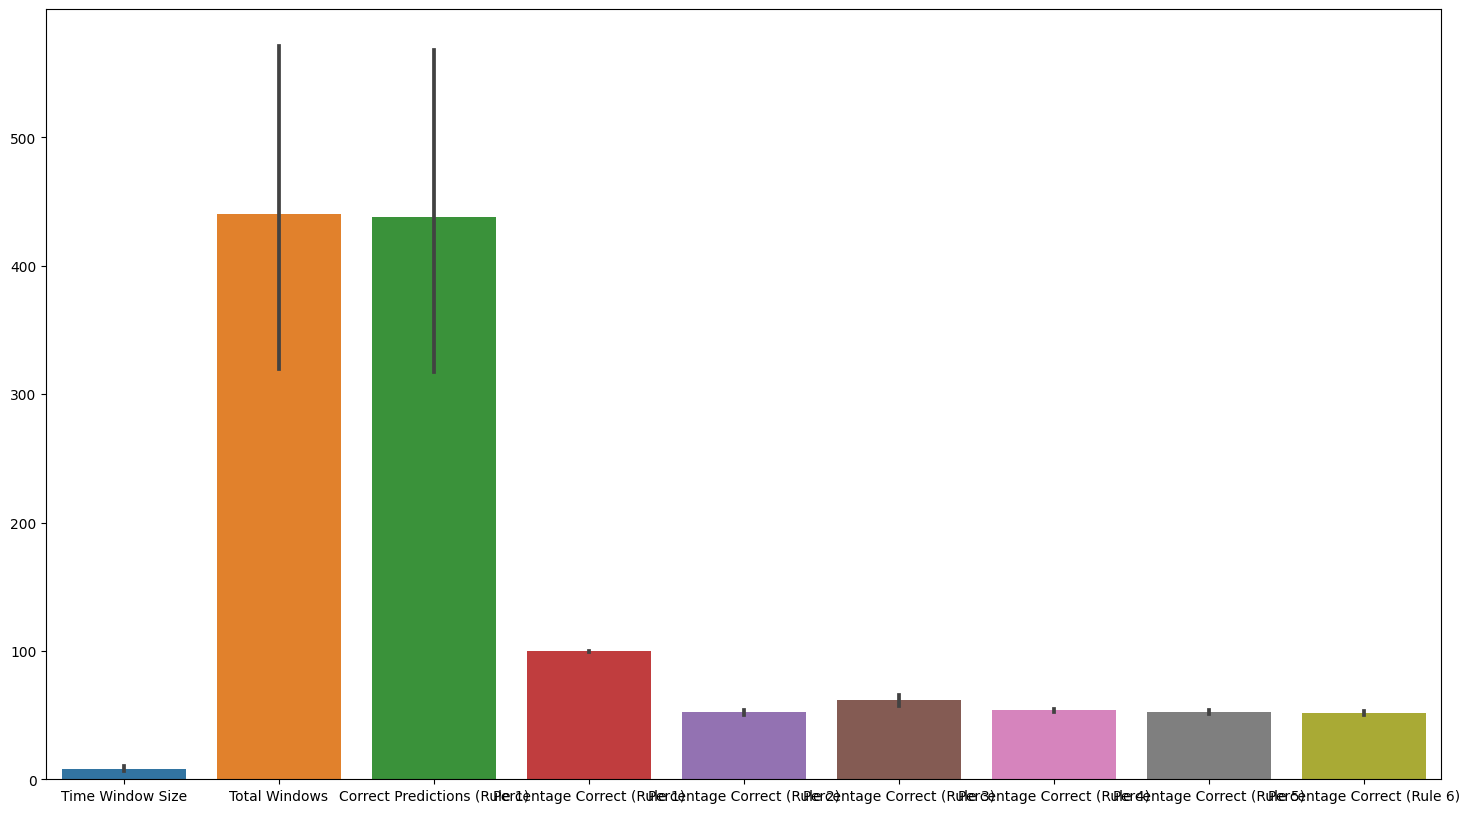

,Currency,Time Window Size,Total Windows,Correct Predictions (Rule 1),Percentage Correct (Rule 1),Percentage Correct (Rule 2),Percentage Correct (Rule 3),Percentage Correct (Rule 4),Percentage Correct (Rule 5),Percentage Correct (Rule 6)
0,USD,3,839,839,100.000000,57.806913,76.162098,56.853397,56.376639,57.210965
1,EUR,3,839,836,99.642431,53.873659,72.824791,55.661502,52.562574,53.635280
2,SEK,3,839,828,98.688915,58.164482,74.016687,57.806913,57.449344,56.972586
3,SGD,3,839,838,99.880810,58.879619,74.851013,57.449344,58.760429,56.853397
4,USD,5,503,503,100.000000,53.479125,65.208748,53.479125,51.689861,52.683897
5,EUR,5,503,500,99.403579,51.093439,66.003976,54.075547,52.286282,50.894632
6,SEK,5,503,496,98.608350,51.491054,62.823062,53.280318,49.502982,48.508946
7,SGD,5,503,502,99.801193,52.485089,62.226640,51.689861,51.491054,52.286282
8,USD,10,251,251,100.000000,52.191235,56.573705,55.378486,49.003984,49.402390
9,EUR,10,251,250,99.601594,46.613546,55.378486,53.386454,50.996016,46.215139


In [7]:
# sns.boxenplot(result_df.iloc[0:7])

selected_columns = result_df.iloc[:, :4].join(result_df.iloc[:, -6:])
# selected_columns.columns = ['Currency', '(Rule 1)',
#        '(Rule 2)', ' (Rule 3)',
#        '(Rule 4)', ' (Rule 5)',
#        ' (Rule 6)']
# You can adjust the height and aspect values as needed
# sns.catplot(data=selected_columns, kind="box", height=8, aspect=2)
# Display the plot
plt.figure(figsize=(18, 10))  # Adjust the width and height as needed
# Create the bar plot
sns.barplot(data=selected_columns)

# Display the plot
plt.show()
selected_columns

In [9]:
import os

# Define the folder where you want to save the Excel file
folder_path = "C:/Users/baqer/OneDrive - OsloMet/Oslomet ACIT/Høst2023/ACIT4420 Problem Solvign with scripting/Final_project/02.Data"

# Create the full path by joining the folder path and the file name
excel_file_path = os.path.join(folder_path, "result_totle_window_size.xlsx")

# Save the result_df DataFrame to an Excel file
result_df.to_excel(excel_file_path, index=False)

# Print the path where the file is saved
print(f"/nResult DataFrame saved to {excel_file_path}")

/nResult DataFrame saved to C:/Users/baqer/OneDrive - OsloMet/Oslomet ACIT/Høst2023/ACIT4420 Problem Solvign with scripting/Final_project/02.Data\result_totle_window_size.xlsx


In [10]:
import pandas as pd
# Assuming you have already loaded your raw_data
# Take a copy of the Data as a pandas DataFrame
df = raw_data.copy()
# Convert the 'Time' column 
df['Time'] = pd.to_datetime(df['Time'])

# Initiate the time_window_sizes list to store the time window size 
time_window_sizes = []
while True:
    try:
        value = int(input("Enter a time window size (choose from [3, 5, 10, 15,20]): "))
        if value in [3, 5, 10, 15]:
            time_window_sizes.append(value)
        else:
            print("Invalid value. Please choose one of [3, 5, 10, 15,20].")
    except ValueError:
        print("Invalid input. Please enter a valid integer.")

    response = input("Do you want to add another time window size? (yes/no): ").lower()
    if response != 'yes':
        break  # Exit the loop if the user does not want to add more time window sizes

# Now time_window_sizes contains the opted time window sizes
print("Chosen time window sizes:", time_window_sizes)

# Initiate the currency list to store the number of currency
currencies = []

# Ask the user for the number of currencies they want to forecast
num_currencies = int(input("How many currencies do you want to forecast? Max:(12) Enter a number: "))

# Allow the user to input currencies
for i in range(num_currencies):
    while True:
        try:
            currency_input = input(
                f"Enter currency {i + 1} vs NOK ('HKD', 'EUR', 'CAD', 'USD', 'AUD', 'SGD', 'JPY', 'PKR', 'SEK','NZD', 'TRY', 'BRL'): "
            )
            if currency_input.upper() in ['HKD', 'EUR', 'CAD', 'USD', 'AUD', 'SGD', 'JPY', 'PKR', 'SEK','NZD', 'TRY', 'BRL']:
                currencies.append(currency_input.upper())
                break
            else:
                print("Invalid currency. Please enter one of [HKD, EUR, CAD, USD, AUD, SGD, JPY, PKR, SEK, NZD, TRY, BRL].")
        except ValueError:
            print("Invalid value. Please try again.")

# Now 'currencies' list contains the selected currencies
print("Selected currencies:", currencies)

# Create an empty DataFrame to store the results
result_data = pd.DataFrame(columns=['Currency', 'Time Window Size', 'Segment Difference', 'Total Windows',
                                  'Correct Predictions (Rule 1)', 'Correct Predictions (Rule 2)',
                                  'Correct Predictions (Rule 3)', 'Correct Predictions (Rule 4)',
                                  'Correct Predictions (Rule 5)', 'Correct Predictions (Rule 6)',
                                  'Percentage Correct (Rule 1)', 'Percentage Correct (Rule 2)',
                                  'Percentage Correct (Rule 3)', 'Percentage Correct (Rule 4)',
                                  'Percentage Correct (Rule 5)', 'Percentage Correct (Rule 6)'])

# Iterate through the time window sizes and currencies
for time_window_size in time_window_sizes:
    for currency in currencies:
        # Create lists to store segment differences for each window
        segment_differences = []
        correct_predictions_rule1 = 0
        correct_predictions_rule2 = 0
        correct_predictions_rule3 = 0
        correct_predictions_rule4 = 0
        correct_predictions_rule5 = 0
        correct_predictions_rule6 = 0

        total_windows = 0

        for i in range(0, len(df) - time_window_size + 1, time_window_size):
            window_data = df.iloc[i:i + time_window_size]
            segment_difference = window_data[currency].diff().iloc[-1]
            segment_differences.append(segment_difference)

            # Implement Rule 1 for prediction
            rule1_prediction = 'Positive' if segment_difference >= 0 else 'Negative'
            if rule1_prediction == 'Positive' and segment_difference >= 0:
                correct_predictions_rule1 += 1
            elif rule1_prediction == 'Negative' and segment_difference < 0:
                correct_predictions_rule1 += 1

            # Implement Rule 2 for prediction
            avg_currency = window_data[currency].mean()
            prev_avg_currency = df[currency].iloc[i - time_window_size:i].mean()
            rule2_prediction = 'Positive' if avg_currency >= prev_avg_currency else 'Negative'
            if rule2_prediction == 'Positive' and segment_difference >= 0:
                correct_predictions_rule2 += 1
            elif rule2_prediction == 'Negative' and segment_difference < 0:
                correct_predictions_rule2 += 1

            # Implement Rule 3 for prediction
            correlation = window_data[currency].corr(window_data['Time'])
            rule3_prediction = 'Positive' if correlation >= 0 else 'Negative'
            if rule3_prediction == 'Positive' and segment_difference >= 0:
                correct_predictions_rule3 += 1
            elif rule3_prediction == 'Negative' and segment_difference < 0:
                correct_predictions_rule3 += 1

            # Implement Rule 4 for prediction
            max_currency = window_data[currency].max()
            prev_max_currency = df[currency].iloc[i - time_window_size:i].max()
            rule4_prediction = 'Positive' if max_currency >= prev_max_currency else 'Negative'
            if rule4_prediction == 'Positive' and segment_difference >= 0:
                correct_predictions_rule4 += 1
            elif rule4_prediction == 'Negative' and segment_difference < 0:
                correct_predictions_rule4 += 1

            # Implement Rule 5 for prediction
            min_currency = window_data[currency].min()
            prev_min_currency = df[currency].iloc[i - time_window_size:i].min()
            rule5_prediction = 'Positive' if min_currency >= prev_min_currency else 'Negative'
            if rule5_prediction == 'Positive' and segment_difference >= 0:
                correct_predictions_rule5 += 1
            elif rule5_prediction == 'Negative' and segment_difference < 0:
                correct_predictions_rule5 += 1

            # Implement Rule 6 for prediction
            median_currency = window_data[currency].median()
            prev_median_currency = df[currency].iloc[i - time_window_size:i].median()
            rule6_prediction = 'Positive' if median_currency >= prev_median_currency else 'Negative'
            if rule6_prediction == 'Positive' and segment_difference >= 0:
                correct_predictions_rule6 += 1
            elif rule6_prediction == 'Negative' and segment_difference < 0:
                correct_predictions_rule6 += 1
            total_windows += 1

        # Create a temporary DataFrame for the current combination
        temp_data = pd.DataFrame({
            'Currency': [currency],
            'Time Window Size': [time_window_size],
            'Segment Difference': [segment_differences],
            'Total Windows': [total_windows],
            'Correct Predictions (Rule 1)': [correct_predictions_rule1],
            'Correct Predictions (Rule 2)': [correct_predictions_rule2],
            'Correct Predictions (Rule 3)': [correct_predictions_rule3],
            'Correct Predictions (Rule 4)': [correct_predictions_rule4],
            'Correct Predictions (Rule 5)': [correct_predictions_rule5],
            'Correct Predictions (Rule 6)': [correct_predictions_rule6],
            'Percentage Correct (Rule 1)': [correct_predictions_rule1 / total_windows * 100],
            'Percentage Correct (Rule 2)': [correct_predictions_rule2 / total_windows * 100],
            'Percentage Correct (Rule 3)': [correct_predictions_rule3 / total_windows * 100],
            'Percentage Correct (Rule 4)': [correct_predictions_rule4 / total_windows * 100],
            'Percentage Correct (Rule 5)': [correct_predictions_rule5 / total_windows * 100],
            'Percentage Correct (Rule 6)': [correct_predictions_rule6 / total_windows * 100],
        })

        # Concatenate the temporary DataFrame with the result DataFrame
        result_data = pd.concat([result_data, temp_data], ignore_index=True)

# Display the result DataFrame for all combinations of time window sizes and currencies
# Set the Currency as the index to the dataset
# result_df.set_index('Currency', inplace=True)
# Print the dataset
result_data


Chosen time window sizes: [3, 5, 10, 15]
Selected currencies: ['USD', 'EUR', 'SEK', 'SGD']


,Currency,Time Window Size,Segment Difference,Total Windows,Correct Predictions (Rule 1),Correct Predictions (Rule 2),Correct Predictions (Rule 3),Correct Predictions (Rule 4),Correct Predictions (Rule 5),Correct Predictions (Rule 6),Percentage Correct (Rule 1),Percentage Correct (Rule 2),Percentage Correct (Rule 3),Percentage Correct (Rule 4),Percentage Correct (Rule 5),Percentage Correct (Rule 6)
0,USD,3,"[-0.016599999999999504, 0.0026000000000001577,...",839,839,485,639,477,473,480,100.0,57.806913,76.162098,56.853397,56.376639,57.210965
1,EUR,3,"[0.018499999999999517, -0.006499999999999062, ...",839,839,453,613,466,444,451,100.0,53.992849,73.063170,55.542312,52.920143,53.754470
2,SEK,3,"[-0.3100000000000023, -0.25, -0.02999999999998...",839,839,492,622,487,489,482,100.0,58.641240,74.135876,58.045292,58.283671,57.449344
3,SGD,3,"[-0.01750000000000007, -0.013399999999999856, ...",839,839,493,630,481,495,477,100.0,58.760429,75.089392,57.330155,58.998808,56.853397
4,USD,5,"[-0.021600000000000286, 0.0235000000000003, 0....",503,503,269,328,270,260,265,100.0,53.479125,65.208748,53.677932,51.689861,52.683897
5,EUR,5,"[-0.016500000000000625, 0.016000000000000014, ...",503,503,258,333,273,263,259,100.0,51.292247,66.202783,54.274354,52.286282,51.491054
6,SEK,5,"[-0.09000000000000341, 0.46999999999999886, -0...",503,503,262,318,271,256,248,100.0,52.087475,63.220676,53.876740,50.894632,49.304175
7,SGD,5,"[-0.005799999999999805, 0.020199999999999996, ...",503,503,265,314,261,261,263,100.0,52.683897,62.425447,51.888668,51.888668,52.286282
8,USD,10,"[0.0235000000000003, 0.08919999999999995, -0.0...",251,251,131,142,138,123,125,100.0,52.191235,56.573705,54.980080,49.003984,49.800797
9,EUR,10,"[0.016000000000000014, 0.15949999999999953, 0....",251,251,118,139,136,129,117,100.0,47.011952,55.378486,54.183267,51.394422,46.613546


In [16]:
import os

# Define the folder where you want to save the Excel file
folder_path = "C:/Users/baqer/OneDrive - OsloMet/Oslomet ACIT/Høst2023/ACIT4420 Problem Solvign with scripting/Final_project/02.Data/"

# Create the full path by joining the folder path and the file name
excel_file_path = os.path.join(folder_path, "result_with_individual_time_window.xlsx")

# Save the result_df DataFrame to an Excel file
result_data.to_excel(excel_file_path, index=False)

# Print the path where the file is saved
print(f"/nResult DataFrame saved to {excel_file_path}")


/nResult DataFrame saved to C:/Users/baqer/OneDrive - OsloMet/Oslomet ACIT/Høst2023/ACIT4420 Problem Solvign with scripting/Final_project/02.Data/result_with_individual_time_window.xlsx


# Machine Learning for Time Series Data

In [38]:
# adding the path to the dataset
filepath = r"C:/Users/baqer/OneDrive - OsloMet/Oslomet ACIT/Høst2023/ACIT4420 Problem Solvign with scripting/Final_project/02.Data/DataNorgesBank.xlsx"
# Loading the dataset as pandas DataFrame
raw_data = pd.read_excel(filepath)
# Compying the dataset for data preprocessing 
df = raw_data.copy()
# Setting the Time as datetime format
df['Time'] = pd.to_datetime(df['Time'], dayfirst=False)
# Set the 'Time' column as the index
df.set_index('Time', inplace=True)
# Displaying few samples of the dataset
df.head(2) # Two samples from first two rows
df.tail(2) # Two samples from last two rows
# Concat both as one single dataframe 
Sample = pd.concat([df.head(2), df.tail(2)])
# Displaying Sample as pandas DataFrame 
df.head(10)

,HKD,EUR,CAD,USD,AUD,SGD,JPY,PKR,SEK,NZD,TRY,BRL
Time,,,,,,,,,,,,
2013-10-14,0.7732,8.1325,5.7920,5.9957,5.6819,4.8161,6.1059,5.645,92.43,5.0114,302.00,2.7561
2013-10-15,0.7759,8.1180,5.8089,6.0165,5.7302,4.8408,6.1088,5.663,92.65,5.0360,302.59,2.7537
2013-10-16,0.7737,8.1365,5.7841,5.9999,5.7191,4.8233,6.1002,5.652,92.34,5.0468,302.15,2.7614
2013-10-17,0.7660,8.1150,5.7680,5.9398,5.7160,4.7882,6.0723,5.596,92.45,5.0466,301.79,2.7416
2013-10-18,0.7633,8.0985,5.7481,5.9182,5.7140,4.7824,6.0559,5.578,92.36,5.0223,301.03,2.7501
2013-10-21,0.7637,8.0920,5.7517,5.9208,5.7232,4.7690,6.0312,5.566,92.11,5.0111,299.47,2.7213
2013-10-22,0.7672,8.1335,5.7750,5.9481,5.7509,4.7934,6.0463,5.590,92.82,5.0312,300.03,2.7215
2013-10-23,0.7631,8.1360,5.7340,5.9162,5.6903,4.7716,6.0739,5.559,92.71,4.9501,299.56,2.7122
2013-10-24,0.7587,8.1210,5.6561,5.8827,5.6577,4.7564,6.0460,5.525,92.68,4.9209,297.30,2.6761


In [50]:
# Pricincple of LSTM work
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]
# taking a copy of the original dataset 
data = raw_data.iloc[:,1:13]
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
data1 = pd.DataFrame(scaled_data, columns=df.columns)
# Converting the pandas dataframe to numpy with a window size
def df_to_X_y(data1, window_size):
  df_as_np = data1.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [51]:
 #Initialize a list to store the selected currencies
currencies = []

# Ask the user for the number of currencies they want to predict
num_currencies = int(input("How many currencies do you want to forecast? Max:(1) Enter a number: "))

# Allow the user to input currencies
for i in range(num_currencies):
    while True:
        try:
            currency_input = input(
                f"Enter currency {i + 1} vs NOK ('HKD', 'EUR', 'CAD', 'USD', 'AUD', 'SGD', 'JPY', 'PKR', 'SEK','NZD', 'TRY', 'BRL'): "
            )
            if currency_input.upper() in ['HKD', 'EUR', 'CAD', 'USD', 'AUD', 'SGD', 'JPY', 'PKR', 'SEK','NZD', 'TRY', 'BRL']:
                currencies.append(currency_input.upper())
                break
            else:
                print("Invalid c1urrency. Please enter one of [HKD, EUR, CAD, USD, AUD, SGD, JPY, PKR, SEK, NZD, TRY, BRL].")
        except ValueError:
            print("Invalid value. Please try again.")

# Now 'currencies' list contains the selected currencies
print("Selected currencies:", currencies)

# Select the columns corresponding to the selected currencies
selected_columns = data1[currencies]
selected_columns

Selected currencies: ['CAD']


,CAD
0,0.150597
1,0.156363
2,0.147902
3,0.142409
4,0.135619
...,...
2513,0.898908
2514,0.900819
2515,0.892596
2516,0.896486


In [41]:
# Assing values to the variables and applying the function

WINDOW_SIZE = int(input('Enter the window size:'))
X, y = df_to_X_y(selected_columns, WINDOW_SIZE)
X.shape, y.shape

((2515, 3, 1, 1), (2515, 1))

In [42]:
X_train, y_train = X[:1500], y[:1500]
X_test, y_test = X[1500:], y[1500:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1500, 3, 1, 1), (1500, 1), (1015, 3, 1, 1), (1015, 1))

In [43]:
# Loading the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam, SGD

modellstm = Sequential()
modellstm.add(InputLayer((WINDOW_SIZE, 1)))
modellstm.add(LSTM(64))
modellstm.add(Dense(8, 'relu'))
modellstm.add(Dense(1, 'linear'))

In [44]:
#Compiling the model with indices loss, optimizer and learning reate 
modellstm.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

Epoch 1/100
47/47 [==============================] - 2s 9ms/step - loss: 29.6674 - mean_absolute_error: 5.4371 - val_loss: 37.2691 - val_mean_absolute_error: 6.0923
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 24.1635 - mean_absolute_error: 4.9053 - val_loss: 30.4134 - val_mean_absolute_error: 5.5016
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 18.6820 - mean_absolute_error: 4.3100 - val_loss: 23.4415 - val_mean_absolute_error: 4.8276
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 13.3094 - mean_absolute_error: 3.6335 - val_loss: 16.7090 - val_mean_absolute_error: 4.0722
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 8.4570 - mean_absolute_error: 2.8899 - val_loss: 10.8309 - val_mean_absolute_error: 3.2731
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 4.6427 - mean_absolute_error: 2.1327 - val_loss: 6.3954 - val_mean_absolute_error: 2.5066
Epoch 7/100
4

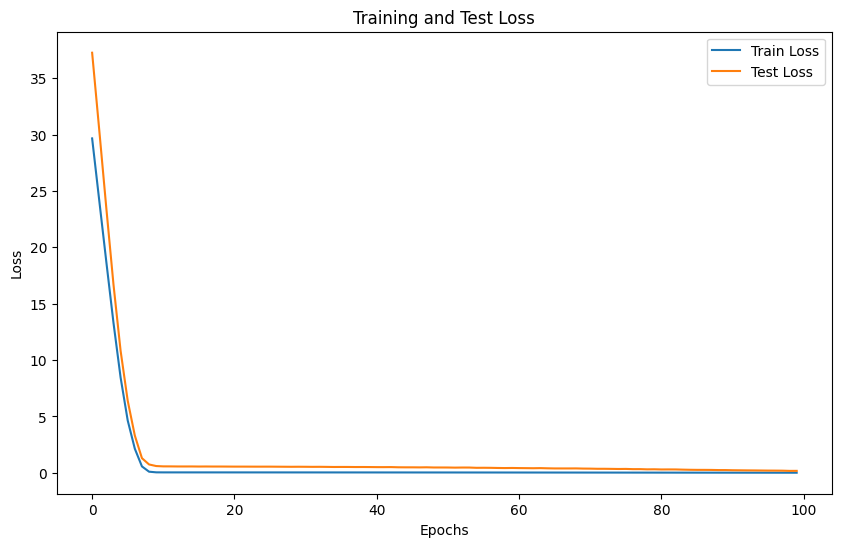

Mean Squared Error (MSE): [0.1736024210273797]
Mean Absolute Error (MAE): [0.36802615622083545]
R-squared: -0.0169846653733563


In [45]:
EPOCHS = int(input('Please enter number of epochs :'))
history = modellstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS)
# Extract relevant metrics from the history object
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

train_loss = history.history['loss']
test_loss = history.history['val_loss']
mse = [mean_squared_error(y_test, modellstm.predict(X_test))]
mae = [mean_absolute_error(y_test, modellstm.predict(X_test))]
r_squared = r2_score(y_test, modellstm.predict(X_test))


# Plot the training and test loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')
plt.show()

# Print the MSE and MAE
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f"R-squared: {r_squared}")

In [46]:
train_predictions = modellstm.predict(X_train).flatten()
y_train_flattened = y_train.flatten()  # Ensure y_train is 1-dimensional

train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train_flattened})
train_results


 1/47 [..............................] - ETA: 0s

47/47 [==============================] - 0s 966us/step


,Train Predictions,Actuals
0,5.914599,5.7680
1,5.909613,5.7481
2,5.893682,5.7517
3,5.883840,5.7750
4,5.883323,5.7340
...,...,...
1495,6.644725,6.8756
1496,6.648456,6.9074
1497,6.661006,6.8578
1498,6.664575,6.8379


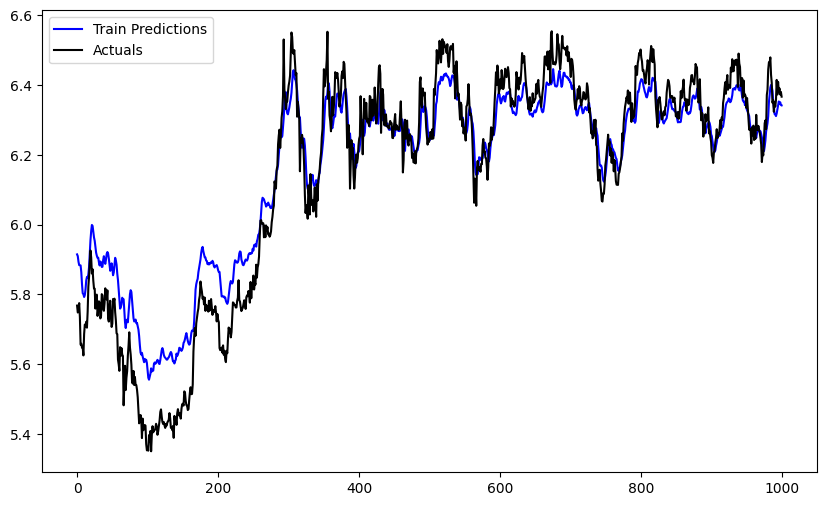

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Plot the train predictions and actual values
plt.plot(train_results['Train Predictions'][:1000], label='Train Predictions',color='blue')
plt.plot(train_results['Actuals'][:1000], label='Actuals',color='black')
# Add a legend
plt.legend()
# Display the plot
plt.show()


In [48]:
test_predictions = modellstm.predict(X_test).flatten()
y_test_flatten = y_test.flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test_flatten})
test_results

 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 1ms/step


,Test Predictions,Actuals
0,6.645389,6.8693
1,6.646846,6.8822
2,6.656160,6.8494
3,6.656297,6.8380
4,6.650502,6.8924
...,...,...
1010,7.256107,7.9853
1011,7.254839,7.9909
1012,7.254910,7.9668
1013,7.248520,7.9782


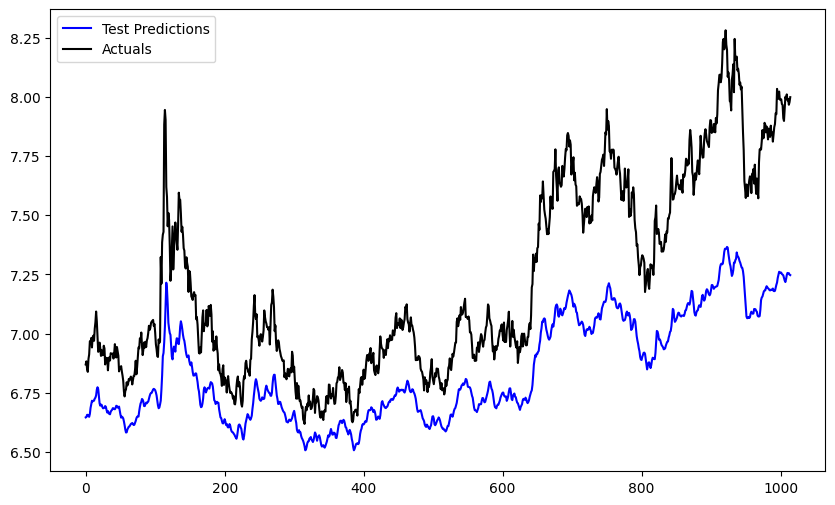

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Assuming you have test_results DataFrame with columns 'Test Predictions' and 'Actuals'

plt.plot(test_results['Test Predictions'][:2000], label='Test Predictions',color='blue')
plt.plot(test_results['Actuals'][:2000], label='Actuals',color='black')
plt.legend()
plt.show()
